In [1]:
にもき!pip install pandas_datareader
!pip install --upgrade pandas
!pip install mplfinance

     |████████████████████████████████| 70 kB 2.7 MB/s 


In [2]:
import pandas as pd
import datetime as dt
from pandas_datareader import data
import mplfinance as mpf
import torch
from torchvision.datasets import ImageFolder
from torchvision import models, transforms
import torch.nn as nn
import numpy as np

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

#apikey = '取得したAPIキー'
apikey = 'KDDTQTNE9OTMD4V4.'
symbol = 'EURUSD'

start = dt.date(2021,1,1)
end = dt.date(2022,2,3)

df = data.DataReader(symbol,'av-daily',start,end, api_key=apikey)

In [3]:
wsize=80 #サンプル期間
after=10 #最終レコード＋α
change_large = 4 #変化大　4%

df.index = pd.DatetimeIndex(df.index)


alldata =[]

for time in range(len(df)-wsize-1):
    try:
        dfspan = df[time:time+wsize]
        alldata.append({"df":dfspan,"date":dfspan.tail(1)})
    except:
        pass

In [4]:
dfspan

,open,high,low,close,volume
2021-10-13,1.1530,1.1599,1.1527,1.1597,0
2021-10-14,1.1597,1.1624,1.1582,1.1598,0
2021-10-15,1.1597,1.1619,1.1586,1.1600,0
2021-10-18,1.1599,1.1622,1.1570,1.1609,0
2021-10-19,1.1609,1.1669,1.1607,1.1629,0
...,...,...,...,...,...
2022-01-26,1.1299,1.1311,1.1234,1.1241,0
2022-01-27,1.1241,1.1243,1.1130,1.1142,0
2022-01-28,1.1143,1.1174,1.1120,1.1146,0
2022-01-31,1.1141,1.1248,1.1137,1.1233,0


In [18]:
a = np.array([x for x in dfspan['close']])
m = np.outer(a, a).astype(np.float32)
print(m)

[[1.3449041 1.34502   1.345252  ... 1.2926016 1.302691  1.3069819]
 [1.34502   1.345136  1.345368  ... 1.292713  1.3028034 1.3070946]
 [1.345252  1.345368  1.3456    ... 1.292936  1.303028  1.30732  ]
 ...
 [1.2926016 1.292713  1.292936  ... 1.2423332 1.2520301 1.2561542]
 [1.302691  1.3028034 1.303028  ... 1.2520301 1.2618029 1.2659591]
 [1.3069819 1.3070946 1.30732   ... 1.2561542 1.2659591 1.270129 ]]


In [16]:
m.shape
print(np.max(m),":",np.min(m))

1.3644576 : 1.2414416


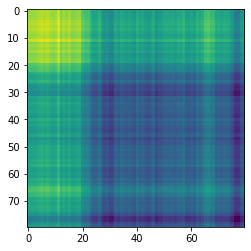

In [17]:
plt.imshow(m, vmin=np.min(m), vmax=np.max(m), interpolation='none')
plt.show()

In [72]:
def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

In [109]:
from PIL import Image

def min_max(x, axis=None):
    min = x.min(axis=axis, keepdims=True)
    max = x.max(axis=axis, keepdims=True)
    result = (x-min)/(max-min)
    return result

a = np.array([x for x in dfspan['close']])
b = np.array([x for x in dfspan['high']])
c = np.array([x for x in dfspan['low']])
m = min_max(np.outer(a,a).astype(np.float32))
n = min_max(np.outer(a-b,b-a).astype(np.float32))
o = min_max(np.outer(a-c,c-a).astype(np.float32))
te = np.stack([m,n,o])
tmp = torch.from_numpy(te).clone()

In [119]:
def get_concat_v(im1, im2,im3,im4):
    dst = Image.new('RGB', (im1.width, im1.height*4))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (0, im1.height))
    dst.paste(im3, (0, im1.height*2))
    dst.paste(im4, (0, im1.height*3))
    return dst

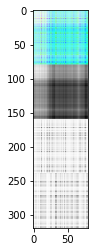

In [120]:
img_pil =  transforms.ToPILImage(mode='RGB')(tmp)
r, g, b = img_pil.split()
all = get_concat_v(img_pil,r,g,b)
plt.imshow(all)
plt.show()